In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data = np.genfromtxt('./test.csv', delimiter=',', skip_header=1)
# print(data)
x_train= np.array(data[:,0])
y_train = np.array(data[:,1])

In [3]:
def compute_model_output(x, w, b):
    m=x.shape[0]
    f_wb= np.zeros(m)
    for i in range(m):
        f_wb[i] = w* x[i] + b
    return f_wb

In [4]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) **2
        cost_sum += cost
    total_cost = (1 / (2*m)) *cost_sum
    return  total_cost

In [5]:
def compute_gradient(x, y, w, b):
    m=x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range (m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb -y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db = dj_db_i
        dj_dw = dj_dw/m
        dj_db = dj_db/m

    return dj_dw, dj_db

In [6]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    w=w_in
    b=b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        b_tmp= b- alpha * dj_db
        w_tmp= w- alpha * dj_dw
        b= b_tmp
        w= w_tmp

                # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
        

    return w, b, J_history, p_history

In [7]:
w_init = 0
b_init = 0
iterations =100
tmp_alpha = 0.005
w_final, b_final, J_history, p_history = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"final vlaues of parameters after gradient descent: w: {w_final} b: {b_final}")
y_pred=np.zeros_like(y_train)
for i in range(y_pred.shape[0]):
    y_pred[i] = w_final*x_train[i]+ b_final

Iteration    0: Cost 1.59e+03  dj_dw: -8.262e+00, dj_db: -1.749e-01   w:  4.131e-02, b: 8.74324e-04
Iteration   10: Cost 6.77e+02  dj_dw: -5.664e+00, dj_db: -1.199e-01   w:  3.789e-01, b: 8.02089e-03
Iteration   20: Cost 2.73e+02  dj_dw: -3.883e+00, dj_db: -8.223e-02   w:  6.104e-01, b: 1.29217e-02
Iteration   30: Cost 1.01e+02  dj_dw: -2.662e+00, dj_db: -5.640e-02   w:  7.691e-01, b: 1.62829e-02
Iteration   40: Cost 3.30e+01  dj_dw: -1.825e+00, dj_db: -3.869e-02   w:  8.779e-01, b: 1.85885e-02
Iteration   50: Cost 9.69e+00  dj_dw: -1.251e+00, dj_db: -2.655e-02   w:  9.525e-01, b: 2.01706e-02
Iteration   60: Cost 4.63e+00  dj_dw: -8.578e-01, dj_db: -1.823e-02   w:  1.004e+00, b: 2.12565e-02
Iteration   70: Cost 6.31e+00  dj_dw: -5.881e-01, dj_db: -1.253e-02   w:  1.039e+00, b: 2.20023e-02
Iteration   80: Cost 9.88e+00  dj_dw: -4.032e-01, dj_db: -8.615e-03   w:  1.063e+00, b: 2.25150e-02
Iteration   90: Cost 1.35e+01  dj_dw: -2.764e-01, dj_db: -5.933e-03   w:  1.079e+00, b: 2.28678e-02


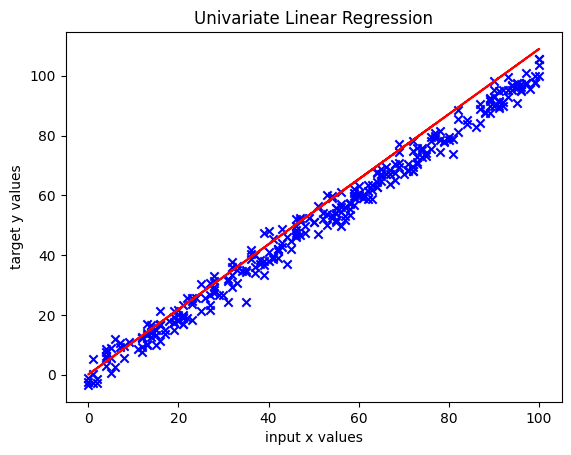

In [8]:
plt.scatter(x_train, y_train, marker='x' ,c='b')
plt.plot(x_train, y_pred, c= 'r' )

plt.title("Univariate Linear Regression")
plt.ylabel("target y values")
plt.xlabel("input x values")
plt.show()

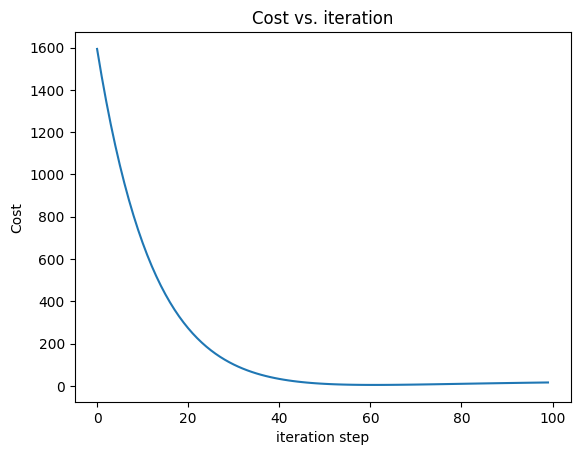

In [11]:
plt.plot(J_history[:100])
# ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])
plt.title("Cost vs. iteration")
plt.ylabel('Cost')  
plt.xlabel('iteration step')
plt.show()

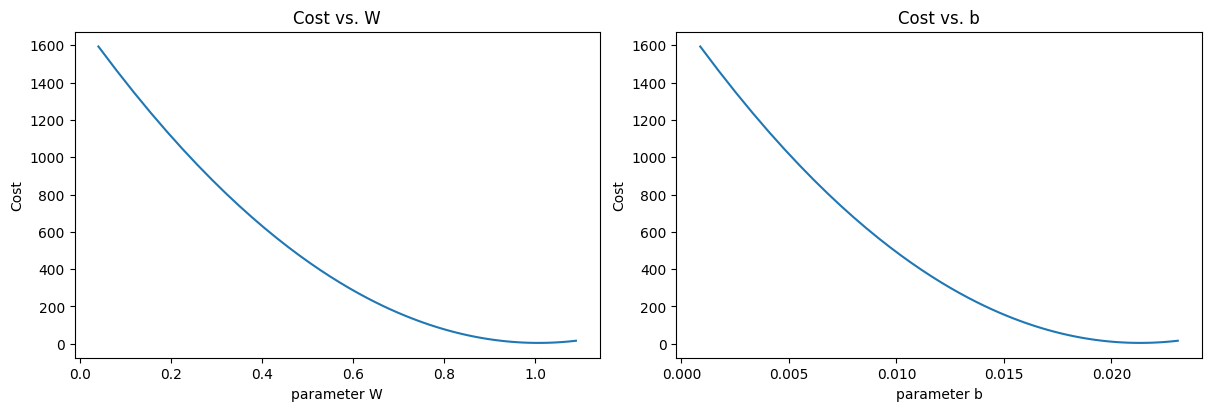

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
x=np.zeros(len(p_history))
y=np.zeros(len(p_history))
v=np.zeros(len(p_history))
for i in range(len(p_history)):
        x[i] = p_history[i][0]
        y[i] = p_history[i][1]
        v[i] = J_history[i]
ax1.plot(x,v)
ax2.plot(y,v)
ax1.set_title("Cost vs. W");  ax2.set_title("Cost vs. b")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('parameter W')  ;  ax2.set_xlabel('parameter b') 
plt.show()